In [2]:
import pandas as pd
customers = pd.read_csv('C:/Users/sunit/Desktop/eCommerce_Transaction Dataset/data/Customers.csv')
products = pd.read_csv('C:/Users/sunit/Desktop/eCommerce_Transaction Dataset/data/Products.csv')
transactions = pd.read_csv('C:/Users/sunit/Desktop/eCommerce_Transaction Dataset/data/Transactions.csv')


In [3]:
print(customers.info())
print(products.info())
print(transactions.info())
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [4]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Verify uniqueness
print(customers['CustomerID'].nunique())  # Should match 200
print(products['ProductID'].nunique())  # Should match 100


200
100


In [5]:
# Assuming transactions DataFrame exists
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


In [6]:
region_spending = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_spending.head(5))


Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<Axes: title={'center': 'Customer Signups by Year'}, xlabel='SignupYear'>

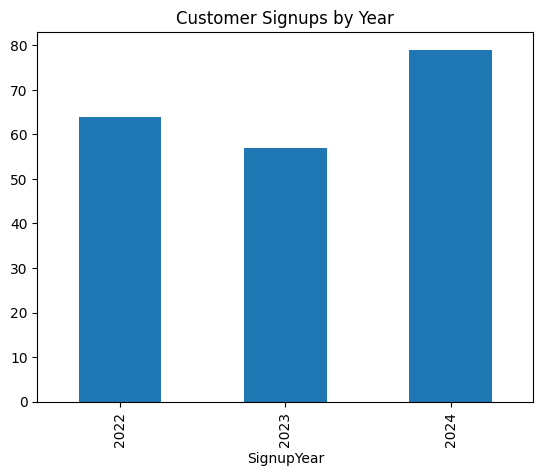

In [7]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
signup_trends.plot(kind='bar', title='Customer Signups by Year')


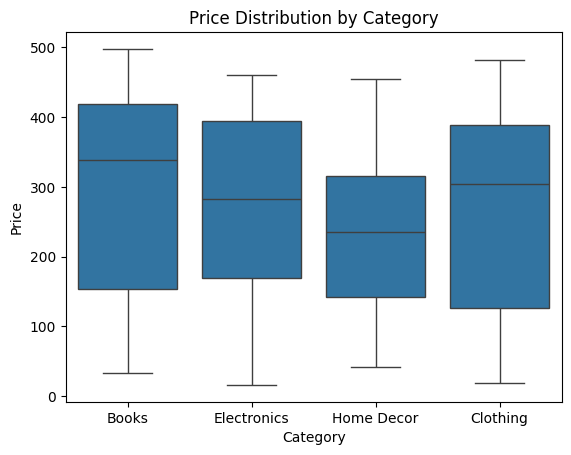

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=products, x='Category', y='Price')
plt.title('Price Distribution by Category')
plt.show()


In [9]:
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(top_products)


ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [12]:
import pandas as pd

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID", how="inner")

# 1. Regional Sales Contribution
regional_sales = merged_data.groupby("Region")["TotalValue"].sum().reset_index()
regional_sales.columns = ["Region", "Total Sales"]
regional_sales["Contribution (%)"] = (regional_sales["Total Sales"] / regional_sales["Total Sales"].sum()) * 100

print("\nRegional Sales Contribution:\n", regional_sales)

# 2. Top-Selling Products in Each Region
top_products = (
    merged_data.groupby(["Region", "ProductID"])["Quantity"].sum()
    .reset_index()
    .sort_values(by=["Region", "Quantity"], ascending=[True, False])
)
top_products = top_products.groupby("Region").head(5)  # Top 5 products per region

print("\nTop-Selling Products in Each Region:\n", top_products)
# Merge with product data to get product names and categories
top_products_with_details = top_products.merge(products[['ProductID', 'ProductName', 'Category']], on='ProductID', how='left')

# Print the result
print("\nTop-Selling Products in Each Region with Product Name and Category:\n", top_products_with_details)
# 3. Sales Growth Analysis Over Time
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data["Year"] = merged_data["TransactionDate"].dt.year

sales_growth = (
    merged_data.groupby(["Year", "Region"])["TotalValue"].sum()
    .reset_index()
    .sort_values(by=["Year", "Region"])
)

print("\nSales Growth Over Time:\n", sales_growth)

# Save outputs to CSVs
regional_sales.to_csv("regional_sales_EDA.csv", index=False)
top_products.to_csv("top_products_by_region_EDA.csv", index=False)
sales_growth.to_csv("sales_growth_EDA.csv", index=False)
top_products_with_details.to_csv("top_products_with_details_EDA.csv",index=False)
print("\nAnalysis completed. Outputs saved to CSV.")



Regional Sales Contribution:
           Region  Total Sales  Contribution (%)
0           Asia    152074.97         22.039993
1         Europe    166254.63         24.095029
2  North America    152313.40         22.074548
3  South America    219352.56         31.790431

Top-Selling Products in Each Region:
             Region ProductID  Quantity
41            Asia      P047        16
68            Asia      P076        14
24            Asia      P028        13
56            Asia      P064        13
35            Asia      P040        12
130         Europe      P049        19
90          Europe      P006        17
169         Europe      P097        17
133         Europe      P054        15
148         Europe      P074        15
196  North America      P027        18
190  North America      P019        17
193  North America      P022        14
218  North America      P051        12
222  North America      P055        12
292  South America      P029        22
315  South America      P05